In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
#kode untuk menddownload data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-07-24 11:45:27--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  2.48MB/s    in 19s     

2021-07-24 11:45:48 (3.45 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [4]:
#melakukan ekstraksi pada file zip
import zipfile
import os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

#mendefinisikan nama direktori untuk data train dan data validasi
base_dir='/tmp/images'
train_dir=os.path.join(base_dir, 'train')
val_dir=os.path.join(base_dir, 'val')

In [6]:
#melihat sub direktory pada data
os.listdir('/tmp/images/train')
os.listdir('/tmp/images/val')

#pada data ada 2 direktory dir messy untuk kamar berantakan dan dir clean untuk kamar bersih

['messy', 'clean']

In [7]:
#membuat direktori ruangan rapi pada direktori data train
train_clean_dir = os.path.join(train_dir, 'clean')

#membuat direktori ruangan berantakan pada direktori train
train_messy_dir = os.path.join(train_dir, 'messy')

#membuat direktori ruangan rapi pada direktori data validation
val_clean_dir = os.path.join(val_dir, 'clean')

#membuat direktori ruangan berantakan pada direktori data validation
val_messy_dir = os.path.join(val_dir, 'messy')

In [8]:
#membuat ImagedataGenerator untuk training dan testing
#kemudahan pada IDG adalah preprocessing data, pelabelan sample otomatis, augmentasi gambar

#augmentasi gambar = untuk membuat data baru(contoh : gambar di flip secara vertikal / horizontal)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'

)

test_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [9]:
#menggunakan objek IDG u/ mempersiapkan data latih 
train_gen = train_datagen.flow_from_directory (
    train_dir, #direktori data latih
    target_size = (150, 150), #mengubah resolusi seluruh gambar menjadi 150x150 px
    batch_size = 4,
    #karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode = 'binary'
)

val_gen = test_datagen.flow_from_directory (
    val_dir, #direktori data validasi
    target_size = (150, 150), #mengubah resolusi seluruh gambar
    batch_size = 4,
    #karena kita menggunakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [10]:
#membagun arsitektur CNN
model = tf.keras.models.Sequential ([
          tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), #mengekstraksi atribut pada gambar
          tf.keras.layers.MaxPooling2D(2, 2), #mereduksi resolusi gambar agar proses pelatihan MLd lebih cepat
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(), #layer input
          tf.keras.layers.Dense(512, activation='relu'), #untuk hidden layer
          tf.keras.layers.Dense(1, activation='sigmoid') #untuk output layer (karena bianry maka gunakan sigmoid)
])

In [11]:
#compile model dengan 'Adam' optimizer loss function 'binary_crossentripy' karena tipe klasifikasi 2 kelas
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy']
              )  

In [15]:
#latih model dengan model.fit
model.fit(
    train_gen,
    steps_per_epoch = 25, #berapa batch yang akan dieksekusi pada setiap epoch
    epochs = 20, #tambahkan epochs jika akurasi model belum optimal
    validation_data = val_gen, #menampilkan akurasi pengujian data validasi
    validation_steps = 5, #berapa batch yang akan dieksekusi pada setiap epochs
    verbose = 2
)

Epoch 1/20
25/25 - 12s - loss: 0.8458 - accuracy: 0.5000 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 10s - loss: 0.6935 - accuracy: 0.5600 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 11s - loss: 0.6941 - accuracy: 0.5100 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 9s - loss: 0.6992 - accuracy: 0.4400 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 10s - loss: 0.6920 - accuracy: 0.5100 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 6/20
25/25 - 9s - loss: 0.6911 - accuracy: 0.5900 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 10s - loss: 0.6887 - accuracy: 0.5500 - val_loss: 0.6354 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 9s - loss: 0.6883 - accuracy: 0.5500 - val_loss: 0.6435 - val_accuracy: 0.8000
Epoch 9/20
25/25 - 9s - loss: 0.6075 - accuracy: 0.7500 - val_loss: 0.9256 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 9s - loss: 0.6870 - accuracy: 0.6000 - val_loss: 0.6859 - val_accuracy: 0.5000
Epoch 11/20
25

Saving download (6).jpg to download (6).jpg
download (6).jpg
clean


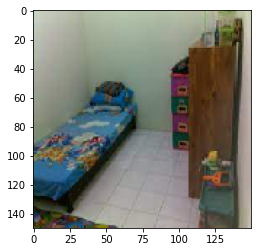

In [23]:
#melihat hasil dari model
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#buat file upload
upload = files.upload()

for fn in upload.keys():

  #predict images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  image = np.vstack([x])
  classes = model.predict(image, batch_size=10)

  print(fn)
  if classes == 0:
    print('clean')
  else:
    print('messsy')